# 2.8羊驼交易法则
羊驼交易法则：起始时随机买入N只股票，每天卖掉收益率最差的M只，再随机买入剩余股票池的M只。即：随机选股，周期调仓。

显然随机性很大，改进策略：买入历史收益率最低的N只股票，调仓日留下反转程度大的股票，卖掉表现最差的M只股票，再买入收益率最低的M只股票。

In [ ]:
def initialize(context):
    set_benchmark('000300.XSHG')
    set_option('use_real_price', True)
    set_order_cost(OrderCost(open_tax=0, close_tax=0.001, \
    open_commission=0.0003,close_commission=0.0003, \
    close_today_commission=0, min_commission=5),type='stock')
    
    g.security = get_index_stocks('000300.XSHG')
    g.period = 30
    g.N = 10
    g.change = 1
    g.init = True
    run_monthly(handle,1)

def get_sorted_stocks(context,stocks):
    df = history(g.period,field = 'close', security_list = stocks).T
    df['ret'] = (df.iloc[:,-1] - df.iloc[:,0])/df.iloc[:,0]
    df = df.sort_values('ret', ascending=False)
    return df.index.values

def handle(context):
    if g.init:
        stocks = get_sorted_stocks(context, g.security)[:g.N]
        cash = context.portfolio.available_cash * 0.9 / len(stocks)
        for stock in stocks:
            order_value(stock,cash)
        g.init = False
        return
    stocks = get_sorted_stocks(context, context.portfolio.positions.keys())
    
    for stock in stocks[-g.change:]:
        order_target(stock,0)
        
    stocks = get_sorted_stocks(context, g.security)
    
    for stock in stocks:
        if len(context.portfolio.positions) >=g.N:
            break
        if stock not in context.portfolio.positions:
            order_value(stock, context.portfolio.available_cash *0.9)
   

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

import numpy as np
import pandas as pd
data = pd.read_csv('/data/量化交易策略回测结果/2.8羊驼交易法则.csv',encoding = 'ansi')
data.head()

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%)
0,2019-01-02 16:00:00,-1.37,-0.67,0.0,-672.0,80628,0,0.71
1,2019-01-03 16:00:00,-1.52,-1.21,0.0,-541.0,0,0,0.31
2,2019-01-04 16:00:00,0.84,-0.64,572.0,0.0,0,0,-1.47
3,2019-01-07 16:00:00,1.45,0.32,964.0,0.0,0,0,-1.11
4,2019-01-08 16:00:00,1.23,-0.48,0.0,-801.0,0,0,-1.69


In [2]:
data.tail()

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%)
113,2019-06-24 16:00:00,27.59,29.94,1396.8,0.0,0,0,1.84
114,2019-06-25 16:00:00,26.26,27.83,0.0,-2117.0,0,0,1.24
115,2019-06-26 16:00:00,26.03,26.37,0.0,-1461.0,0,0,0.27
116,2019-06-27 16:00:00,27.38,26.81,449.0,0.0,0,0,-0.45
117,2019-06-28 16:00:00,27.07,26.66,0.0,-151.0,0,0,-0.32


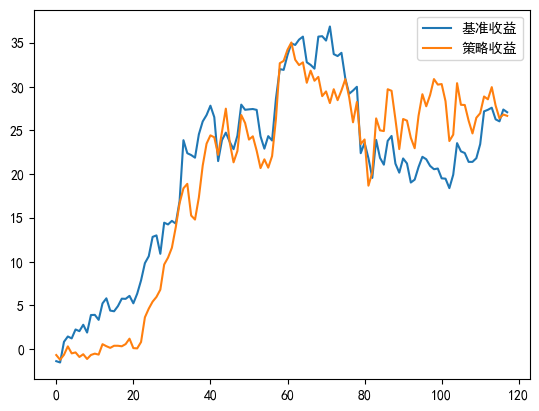

In [3]:
data[['基准收益', '策略收益']].plot()
plt.show()